# Equipo 2: Trabajo parcial

## Semana 7
## Curso: Minería de Datos
## Integrantes:
* Blas Ruiz, Luis Aaron - 19200069
* Huarhuachi Ortega, Andrea Mariana - 19200267
* Ramos Rivas, Kevin Keyler - 19200096
* Rojas Villanueva, Paula Elianne - 19200266
* Torres Talaverano, Luz Elena - 19200294

## Información del conjunto de datos
Esta base es respecto a los datos sísmicos las cuales contiene todos los parámetros que caracterizan a un sismo, calculados en las mismas condiciones a fin de constituirse como una base homogénea: fecha, hora, latitud, longitud, profundidad y magnitud.


#### Atributos para el conjunto de datos
* fecha_UTC: Hora universal coordinada (UTC), Es la fecha con cinco horas adelantadas con respecto a la hora local debido a que Peru se encuentra en una zona horaria UTC -5
* hora_UTC: Hora universal coordinada (UTC), cinco horas adelantadas con respecto a la hora local debido a que Peru se encuentra en una zona horaria UTC -5
* latitud(º): Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur
* longitud(º): Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).
* profundidad_km: Profundidad del foco sísmisco por debajo de la superficie

Estas tres columnas luego seran reemplazadas ya que la data nueva del IGP solo posee una columna llamada Magnitud(M)
* magnitud_mb: Magnitud de Ondas de Cuerpo
* magnitud_Ms: Magnitud de Ondas Superficiales
* magnitud_Mw: Magnitud Momento (Corresponde a la cantidad de energía liberada por el sismo)

## Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Leer archivo de datos historicos**

In [2]:
myData = pd.read_csv('https://raw.githubusercontent.com/KevinRamosRivas/G2-MINERIA_DATOS/main/IGP_datos_sismicosHist%C3%B3rico.csv')

**Información de la data**

In [3]:
myData.head()

,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_mb,magnitud_Ms,magnitud_Mw
0,02/07/1552,10:30:00.00,-16.6,-71.3,30,7.6,NaN,NaN
1,15/11/1555,00:00:00.00,-11.9,-77.6,30,NaN,8.4,NaN
2,04/04/1568,00:00:00.00,-12.3,-77.7,30,6.6,6.4,NaN
3,22/01/1582,16:30:00.00,-16.6,-71.6,30,NaN,8.2,7.5
4,15/08/1582,00:00:00.00,-12.2,-77.6,30,NaN,7.8,NaN


In [4]:
myData.describe()

,latitud(º),longitud(º),magnitud_mb
count,1104.000000,1104.000000,977.000000
mean,-11.994102,-75.533290,4.341863
std,4.033727,3.250451,0.867915
min,-23.500000,-84.000000,2.800000
25%,-15.500000,-77.600000,3.800000
50%,-12.200000,-76.200000,4.300000
75%,-9.200000,-72.030000,4.700000
max,-1.750000,-67.500000,7.800000


In [5]:
print(myData.describe)

<bound method NDFrame.describe of        fecha_UTC     hora_UTC  latitud(º)  longitud(º) profundidad_km  \
0     02/07/1552  10:30:00.00      -16.60        -71.3             30   
1     15/11/1555  00:00:00.00      -11.90        -77.6             30   
2     04/04/1568  00:00:00.00      -12.30        -77.7             30   
3     22/01/1582  16:30:00.00      -16.60        -71.6             30   
4     15/08/1582  00:00:00.00      -12.20        -77.6             30   
...          ...          ...         ...          ...            ...   
1099    -/-/1471  00:00:00.00      -16.30        -71.0             25   
1100    -/-/1513  00:00:00.00      -17.21        -72.3             30   
1101   -/01/1533  00:00:00.00      -12.20        -77.8             30   
1102    -/-/1581  00:00:00.00      -12.40        -77.7             30   
1103    -/-/1590  00:00:00.00      -17.20        -72.9             40   

      magnitud_mb magnitud_Ms magnitud_Mw  
0             7.6         NaN         NaN  
1

In [6]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fecha_UTC       1104 non-null   object 
 1   hora_UTC        1104 non-null   object 
 2   latitud(º)      1104 non-null   float64
 3   longitud(º)     1104 non-null   float64
 4   profundidad_km  1046 non-null   object 
 5   magnitud_mb     977 non-null    float64
 6   magnitud_Ms     211 non-null    object 
 7   magnitud_Mw     13 non-null     object 
dtypes: float64(3), object(5)
memory usage: 69.1+ KB


Escalas de magnitud: https://www.snet.gob.sv/ver/seccion+educativa/sismologia/escalas+de+magnitud/
- magnitud (mb): Magnitud de Ondas de Cuerpo
- magnitud (Ms): Magnitud de Ondas Superficiales
- magnitud (Mw:  Magnitud Momento
- magnitud (M)

## 1. Buscar nulos e imputar con (promedio, moda, regresion)

In [7]:
print(myData.isnull().any())

fecha_UTC         False
hora_UTC          False
latitud(º)        False
longitud(º)       False
profundidad_km     True
magnitud_mb        True
magnitud_Ms        True
magnitud_Mw        True
dtype: bool


In [8]:
# hallar la cantidad de nulos por columna
myData.isnull().sum()

fecha_UTC            0
hora_UTC             0
latitud(º)           0
longitud(º)          0
profundidad_km      58
magnitud_mb        127
magnitud_Ms        893
magnitud_Mw       1091
dtype: int64

Corrigiendo atributos mal categorizados en la data historica

In [9]:
# Convirtiendo profundidad_km , magnitud_mb , magnitud_Ms , magnitud_Mw a tipo numérico
myData['profundidad_km'] = pd.to_numeric(myData['profundidad_km'], errors='coerce')
myData['magnitud_mb'] = pd.to_numeric(myData['magnitud_mb'], errors='coerce')
myData['magnitud_Ms'] = pd.to_numeric(myData['magnitud_Ms'], errors='coerce')
myData['magnitud_Mw'] = pd.to_numeric(myData['magnitud_Mw'], errors='coerce')

**Ordenando atributos por su tipo**

In [10]:
tipos = myData.columns.to_series().groupby(myData.dtypes).groups

**Listando variables categóricas**

In [11]:
colText = tipos[np.dtype('object')]
print(colText)
print(len(colText))

Index(['fecha_UTC', 'hora_UTC'], dtype='object')
2


**Listando variables numéricas**

In [12]:
columnas = myData.columns
colNum = list(set(columnas)-set(colText))
print(colNum)
print(len(colNum))
# eliminar de colNum la columna magnitud_Mw
colNum.remove('magnitud_Mw')
colNum.remove('magnitud_Ms')
print(colNum)

['latitud(º)', 'magnitud_mb', 'magnitud_Mw', 'profundidad_km', 'longitud(º)', 'magnitud_Ms']
6
['latitud(º)', 'magnitud_mb', 'profundidad_km', 'longitud(º)']


**Completando valores perdidos en atributos categóricos**

In [13]:
# mode = más frecuente
for c in colText:
    myData[c] = myData[c].replace('-', np.NaN)
    mode = myData[c].mode()[0]
    myData[c] = myData[c].fillna(mode)

**Completamos valores perdidos en atributos numéricos**

In [14]:
# mean = media
for c in colNum:
    mean = myData[c].mean()
    myData[c] = myData[c].fillna(mean)

Después de completar los valores perdidos, observemos si hay todavía nulls

In [15]:
print(myData.isnull().any())

fecha_UTC         False
hora_UTC          False
latitud(º)        False
longitud(º)       False
profundidad_km    False
magnitud_mb       False
magnitud_Ms        True
magnitud_Mw        True
dtype: bool


In [16]:
myData.head()

,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_mb,magnitud_Ms,magnitud_Mw
0,02/07/1552,10:30:00.00,-16.6,-71.3,30.0,7.600000,NaN,NaN
1,15/11/1555,00:00:00.00,-11.9,-77.6,30.0,4.341863,8.4,NaN
2,04/04/1568,00:00:00.00,-12.3,-77.7,30.0,6.600000,6.4,NaN
3,22/01/1582,16:30:00.00,-16.6,-71.6,30.0,4.341863,8.2,7.5
4,15/08/1582,00:00:00.00,-12.2,-77.6,30.0,4.341863,7.8,NaN


Completamos la columna magnitud_Ms en base a la columna magnitud_mb
basandono en el articulo [Relaciones empíricas entre las magnitudes mb/Ms, Ms/Mw y mb/Mc para el área de Cuba, Jamaica y La Española](https://www.researchgate.net/publication/326782345_Relaciones_empiricas_entre_las_magnitudes_mbMs_MsMw_y_mbMc_para_el_area_de_Cuba_Jamaica_y_La_Espanola)

In [17]:
# completar los nulos de magnitud_Ms en base a magnitud_mb si es nulo
myData['magnitud_Ms'] = myData['magnitud_Ms'].fillna((myData['magnitud_mb']*1.35) - 2.010)

<AxesSubplot:xlabel='magnitud_Ms', ylabel='count'>

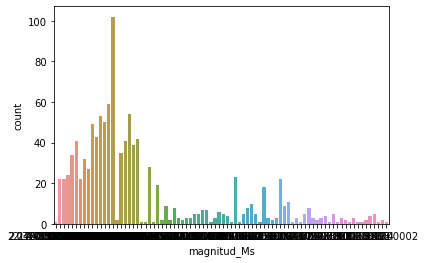

In [18]:
# ver grafica de barras de magnitud_Ms
sns.countplot(x='magnitud_Ms', data=myData)

In [19]:
# ver la cantidad de nulos de magnitud_Ms
myData['magnitud_Ms'].isnull().sum()

0

Completamos la columna magnitud_Ms en base a la columna magnitud_mb basandonos en el articulos [Empirical global relations converting MS and mb to moment magnitude](https://sci-hub.se/10.1007/s10950-006-9012-4)

In [20]:
import math
# recorre la columna magnitud_Ms y si es menor a 3.0 y mayor a 2.0, se le asigna el valor de 2.5
for i in range(len(myData['magnitud_Ms'])):
    if math.isnan(myData['magnitud_Mw'][i]):
        if myData['magnitud_Ms'][i] >= 3.0 and myData['magnitud_Ms'][i] <= 6.1:
            myData['magnitud_Mw'][i] = myData['magnitud_Ms'][i]*0.67 + 2.07
        if myData['magnitud_Ms'][i] > 6.1 and myData['magnitud_Ms'][i] <= 8.2:
            myData['magnitud_Mw'][i] = myData['magnitud_Ms'][i]*0.99 + 0.08
        if myData['magnitud_Ms'][i] > 8.2 or myData['magnitud_Ms'][i] < 3.0:
            myData['magnitud_Mw'][i] = myData['magnitud_Mw'].mean()


C:\Users\ramos\AppData\Local\Temp\ipykernel_13336\3185102373.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['magnitud_Mw'][i] = myData['magnitud_Mw'].mean()
C:\Users\ramos\AppData\Local\Temp\ipykernel_13336\3185102373.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData['magnitud_Mw'][i] = myData['magnitud_Ms'][i]*0.99 + 0.08
C:\Users\ramos\AppData\Local\Temp\ipykernel_13336\3185102373.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [21]:
# ver nulos en la columna magnitud_Mw
myData['magnitud_Mw'].isnull().sum()

0

**Exportación del nuevo archivo**

In [22]:
myData.to_csv("IGP_datos_sismicosHistórico_V1.csv", index=False)

## 2. Identificación de valores atipicos

In [23]:
myData = pd.read_csv('IGP_datos_sismicosHistórico_V1.csv')

<AxesSubplot:>

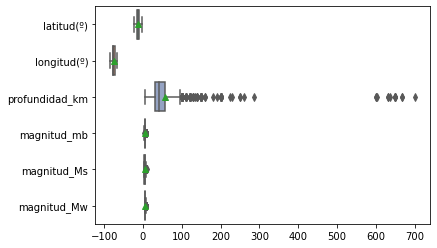

In [24]:
sns.boxplot(data=myData, orient = "h", showmeans = True,palette="Set2")

In [25]:
# eliminar los outliers de la columna profundidad_km
Q1 = myData['profundidad_km'].quantile(0.25)
Q3 = myData['profundidad_km'].quantile(0.75)
IQR = Q3 - Q1
myData = myData[~((myData['profundidad_km'] < (Q1 - 1.5 * IQR)) |(myData['profundidad_km'] > (Q3 + 1.5 * IQR)))]
# eliminar los outliers de la columna magnitud_Mw
Q1 = myData['magnitud_Mw'].quantile(0.25)
Q3 = myData['magnitud_Mw'].quantile(0.75)
IQR = Q3 - Q1
myData = myData[~((myData['magnitud_Mw'] < (Q1 - 1.5 * IQR)) |(myData['magnitud_Mw'] > (Q3 + 1.5 * IQR)))]
# eliminar los outliers de la columna magnitud_Ms
Q1 = myData['magnitud_Ms'].quantile(0.25)
Q3 = myData['magnitud_Ms'].quantile(0.75)
IQR = Q3 - Q1
myData = myData[~((myData['magnitud_Ms'] < (Q1 - 1.5 * IQR)) |(myData['magnitud_Ms'] > (Q3 + 1.5 * IQR)))]
# eliminar los outliers de la columna magnitud_mb
Q1 = myData['magnitud_mb'].quantile(0.25)
Q3 = myData['magnitud_mb'].quantile(0.75)
IQR = Q3 - Q1
myData = myData[~((myData['magnitud_mb'] < (Q1 - 1.5 * IQR)) |(myData['magnitud_mb'] > (Q3 + 1.5 * IQR)))]

<AxesSubplot:>

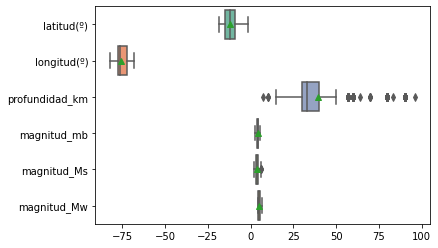

In [26]:
sns.boxplot(data=myData, orient = "h", showmeans = True,palette="Set2")

## 3. Tranformación de datos

Separacion de la columna fecha en dia, mes, año

In [27]:
df_date = myData['fecha_UTC'].str.split('/', expand=True)
df_date = df_date.rename(columns={0:'dia', 1:'mes', 2:'año'})
# convertir a tipo numérico
df_date['dia'] = pd.to_numeric(df_date['dia'], errors='coerce')
df_date['mes'] = pd.to_numeric(df_date['mes'], errors='coerce')
df_date['año'] = pd.to_numeric(df_date['año'], errors='coerce')

In [28]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 29 to 1098
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   dia     870 non-null    int64
 1   mes     870 non-null    int64
 2   año     870 non-null    int64
dtypes: int64(3)
memory usage: 27.2 KB


In [29]:
df_sismos = pd.concat([df_date, myData], axis=1)

In [30]:
df_sismos.head()

,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_mb,magnitud_Ms,magnitud_Mw
29,2,8,1700,02/08/1700,21:00:00.00,-13.90,-72.1,10.0,4.100000,3.525,4.43175
30,18,9,1707,18/09/1707,05:00:00.00,-13.90,-72.1,10.0,4.400000,3.930,4.70310
31,23,5,1709,23/05/1709,07:00:00.00,-12.60,-77.5,60.0,4.600000,4.200,4.88400
33,17,6,1719,17/06/1719,00:00:00.00,-13.20,-74.4,20.0,4.600000,4.200,4.88400
36,19,11,1744,19/11/1744,11:30:00.00,-13.77,-72.1,20.0,4.341863,4.800,5.28600


Separacion de hora_UTC en hora, minutos, segundos

In [31]:
# separación de hora_UTC en hora , minuto y segundo
df_hora = df_sismos['hora_UTC'].str.split(':', expand=True)
df_hora = df_hora.rename(columns={0:'hora', 1:'minuto', 2:'segundo'})
# eliminar la columna segundo
df_hora = df_hora.drop(['segundo'], axis=1)
# convertir a tipo numérico
df_hora['hora'] = pd.to_numeric(df_hora['hora'], errors='coerce')
df_hora['minuto'] = pd.to_numeric(df_hora['minuto'], errors='coerce')
df_hora.head()

,hora,minuto
29,21,0
30,5,0
31,7,0
33,0,0
36,11,30


In [32]:
# concatenar las columnas hora, minuto  con df_sismos
df_sismos = pd.concat([df_hora, df_sismos], axis=1)

In [33]:
df_sismos.tail()

,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_mb,magnitud_Ms,magnitud_Mw
1091,3,22,22,6,1959,22/06/1959,03:22:51.00,-4.0,-81.0,33.0,5.4,5.280,5.60760
1093,8,28,6,7,1959,06/07/1959,08:28:20.00,-15.5,-75.0,33.0,4.3,3.795,4.61265
1095,18,28,15,8,1959,15/08/1959,18:28:57.00,-8.0,-79.5,33.0,5.1,4.875,5.33625
1097,20,52,13,10,1959,13/10/1959,20:52:25.00,-9.0,-79.5,33.0,5.0,4.740,5.24580
1098,7,2,2,12,1959,02/12/1959,07:02:52.00,-9.0,-80.0,33.0,4.4,3.930,4.70310


In [34]:
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 29 to 1098
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hora            870 non-null    int64  
 1   minuto          870 non-null    int64  
 2   dia             870 non-null    int64  
 3   mes             870 non-null    int64  
 4   año             870 non-null    int64  
 5   fecha_UTC       870 non-null    object 
 6   hora_UTC        870 non-null    object 
 7   latitud(º)      870 non-null    float64
 8   longitud(º)     870 non-null    float64
 9   profundidad_km  870 non-null    float64
 10  magnitud_mb     870 non-null    float64
 11  magnitud_Ms     870 non-null    float64
 12  magnitud_Mw     870 non-null    float64
dtypes: float64(6), int64(5), object(2)
memory usage: 95.2+ KB


In [35]:
# Escalasismos = pd.cut(df_sismos['magnitud_Mw'],[0,3,4,5,6,7,8])
# print(Escalasismos)
# print(pd.value_counts(Escalasismos))

In [36]:
# reiniciar los índices
df_sismos = df_sismos.reset_index(drop=True)

In [37]:
df_sismos.head()

,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_mb,magnitud_Ms,magnitud_Mw
0,21,0,2,8,1700,02/08/1700,21:00:00.00,-13.90,-72.1,10.0,4.100000,3.525,4.43175
1,5,0,18,9,1707,18/09/1707,05:00:00.00,-13.90,-72.1,10.0,4.400000,3.930,4.70310
2,7,0,23,5,1709,23/05/1709,07:00:00.00,-12.60,-77.5,60.0,4.600000,4.200,4.88400
3,0,0,17,6,1719,17/06/1719,00:00:00.00,-13.20,-74.4,20.0,4.600000,4.200,4.88400
4,11,30,19,11,1744,19/11/1744,11:30:00.00,-13.77,-72.1,20.0,4.341863,4.800,5.28600


In [38]:
# creacion de una nueva columna con el nombre de la region del sismo con geopandas
#importar librerias
# from geopy.geocoders import Nominatim

# # crear una lista vacia
# region = []
# # crear un objeto geolocator
# geolocator = Nominatim(user_agent="myGeocoder")
# # iterar sobre la columna latitud y longitud
# for i in range(len(df_sismos)):
#     print(i)
#     # crear una variable para almacenar la latitud y longitud
#     location = geolocator.reverse(str(df_sismos['latitud(º)'][i])+','+str(df_sismos['longitud(º)'][i]))
#     # si la variable location no es noneType
#     if location is not None:
#         # agregar la variable location si existe location.raw['address']['region'] y location.raw['address']['state']
#         if 'region' in location.raw['address'] and 'state' in location.raw['address']:
#             region.append(location.raw['address']['region'] + ', ' + location.raw['address']['state'])
#         else:
#             region.append('MAR, MAR')
#     else:
#         region.append('MAR, MAR')



In [39]:
# # separar la lista region en dos columnas
# df_region = pd.DataFrame(region)
# df_region = df_region[0].str.split(',', expand=True)
# df_region = df_region.rename(columns={0:'provincia', 1:'region'})

In [40]:
# df_region.head()

In [41]:
# #guardar el dataframe en un archivo csv
# df_region.to_csv('region.csv', index=False)

In [42]:
df_region = pd.read_csv('https://raw.githubusercontent.com/KevinRamosRivas/G2-MINERIA_DATOS/main/region_datos_simicosHist%C3%B3rico.csv')

In [43]:
# concatenar df_region con df_sismos
df_sismos = pd.concat([df_region, df_sismos], axis=1)

In [44]:
df_sismos.head()

,provincia,region,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_mb,magnitud_Ms,magnitud_Mw
0,Cotabambas,Apurímac,21,0,2,8,1700,02/08/1700,21:00:00.00,-13.90,-72.1,10.0,4.100000,3.525,4.43175
1,Cotabambas,Apurímac,5,0,18,9,1707,18/09/1707,05:00:00.00,-13.90,-72.1,10.0,4.400000,3.930,4.70310
2,MAR,MAR,7,0,23,5,1709,23/05/1709,07:00:00.00,-12.60,-77.5,60.0,4.600000,4.200,4.88400
3,Huamanga,Ayacucho,0,0,17,6,1719,17/06/1719,00:00:00.00,-13.20,-74.4,20.0,4.600000,4.200,4.88400
4,Paruro,Cusco,11,30,19,11,1744,19/11/1744,11:30:00.00,-13.77,-72.1,20.0,4.341863,4.800,5.28600


## 4. Reducción de dimensionalidad

Seleccionamos un rango entre 3.0 y 8.2 debido a que los valores fuera de este rango no cumplen con las formulas de regresion anteriormmente usadas en la parte 3.0

In [45]:
df_sismos= df_sismos[(df_sismos['magnitud_Ms']>=3.0) & (df_sismos['magnitud_Ms']<=8.2)]

In [46]:
df_sismos.head()

,provincia,region,hora,minuto,dia,mes,año,fecha_UTC,hora_UTC,latitud(º),longitud(º),profundidad_km,magnitud_mb,magnitud_Ms,magnitud_Mw
0,Cotabambas,Apurímac,21,0,2,8,1700,02/08/1700,21:00:00.00,-13.90,-72.1,10.0,4.100000,3.525,4.43175
1,Cotabambas,Apurímac,5,0,18,9,1707,18/09/1707,05:00:00.00,-13.90,-72.1,10.0,4.400000,3.930,4.70310
2,MAR,MAR,7,0,23,5,1709,23/05/1709,07:00:00.00,-12.60,-77.5,60.0,4.600000,4.200,4.88400
3,Huamanga,Ayacucho,0,0,17,6,1719,17/06/1719,00:00:00.00,-13.20,-74.4,20.0,4.600000,4.200,4.88400
4,Paruro,Cusco,11,30,19,11,1744,19/11/1744,11:30:00.00,-13.77,-72.1,20.0,4.341863,4.800,5.28600


In [47]:
# eliminamos las columnas que no vamos a utilizar
df_sismos = df_sismos.drop(['fecha_UTC','hora_UTC','magnitud_mb','magnitud_Ms'], axis=1)
df_sismos.head()

,provincia,region,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,Cotabambas,Apurímac,21,0,2,8,1700,-13.90,-72.1,10.0,4.43175
1,Cotabambas,Apurímac,5,0,18,9,1707,-13.90,-72.1,10.0,4.70310
2,MAR,MAR,7,0,23,5,1709,-12.60,-77.5,60.0,4.88400
3,Huamanga,Ayacucho,0,0,17,6,1719,-13.20,-74.4,20.0,4.88400
4,Paruro,Cusco,11,30,19,11,1744,-13.77,-72.1,20.0,5.28600


### Aplicamos ANOVA para los datos categoricos y asi seleccionar los mejores atributos en base a la variable objetivo

In [48]:
X=df_sismos.iloc[:,:-1]
Y=df_sismos["magnitud_Mw"]

In [49]:
# extraer las columnas de tipo object de X
df_string = X.select_dtypes(include=['object'])

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
# Preparacion
def prepare_inputs(X):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_enc = oe.transform(X)
    return X_enc


In [51]:
#Preparamos la entradas
X_train_enc= prepare_inputs(df_string)
# convertir a dataframe
X_train_enc = pd.DataFrame(X_train_enc)

from sklearn import preprocessing

df_string_z_score=pd.DataFrame(preprocessing.scale(X_train_enc),columns=df_string .columns)
df_string_z_score

,provincia,region
0,-0.863365,-2.158976
1,-0.863365,-2.158976
2,0.322727,0.381768
3,-0.507537,-1.735519
4,1.093687,-1.312061
...,...,...
640,-0.981974,1.863869
641,-1.515715,-1.947248
642,0.322727,0.381768
643,0.322727,0.381768


In [52]:
# hacer el filtro ANOVA para seleccionar las variables más importantes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# seleccionar las 5 variables más importantes
selectKBest = SelectKBest(f_regression, k=2)
# aplicar el filtro
selectKBest.fit(df_string_z_score, Y)
# obtener los scores
scores = selectKBest.scores_
# obtener los p-values
pvalues = selectKBest.pvalues_
# obtener los nombres de las columnas
names = df_string_z_score.columns
# crear un dataframe con los resultados
df_scores = pd.DataFrame({'score':scores, 'pvalue':pvalues}, index=names)
# ordenar el dataframe por el score ascendente
df_scores.sort_values(by='score', ascending=False)

,score,pvalue
region,6.087210,0.013876
provincia,0.475728,0.490613


<AxesSubplot:>

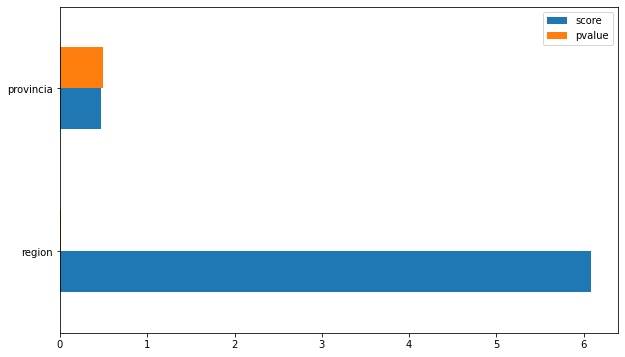

In [53]:
# generar una grafica de barras con los scores en orden ascendente
df_scores.sort_values(by='score', ascending=False).plot(kind='barh', figsize=(10, 6))

### Aplicamos filtro anova para los datos numericos y asi seleccionar los atributos mas relevantes

In [54]:
X.head()

,provincia,region,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km
0,Cotabambas,Apurímac,21,0,2,8,1700,-13.90,-72.1,10.0
1,Cotabambas,Apurímac,5,0,18,9,1707,-13.90,-72.1,10.0
2,MAR,MAR,7,0,23,5,1709,-12.60,-77.5,60.0
3,Huamanga,Ayacucho,0,0,17,6,1719,-13.20,-74.4,20.0
4,Paruro,Cusco,11,30,19,11,1744,-13.77,-72.1,20.0


In [55]:
Y.head()

0    4.43175
1    4.70310
2    4.88400
3    4.88400
4    5.28600
Name: magnitud_Mw, dtype: float64

In [56]:
# separamos por tipo de datos
df_num = X.select_dtypes(include=['int64','float64'])
df_num.head()

,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km
0,21,0,2,8,1700,-13.90,-72.1,10.0
1,5,0,18,9,1707,-13.90,-72.1,10.0
2,7,0,23,5,1709,-12.60,-77.5,60.0
3,0,0,17,6,1719,-13.20,-74.4,20.0
4,11,30,19,11,1744,-13.77,-72.1,20.0


In [57]:
from sklearn import preprocessing

df_num_z_score=pd.DataFrame(preprocessing.scale(df_num),columns=df_num.columns)
df_num_z_score

,hora,minuto,dia,mes,año,latitud(º),longitud(º),profundidad_km
0,1.580330,-1.535360,-1.518559,0.442647,-8.386503,-0.594294,1.453640,-1.682869
1,-0.824773,-1.535360,0.317805,0.736076,-8.146381,-0.594294,1.453640,-1.682869
2,-0.524135,-1.535360,0.891669,-0.437642,-8.077775,-0.237860,-0.400332,0.829431
3,-1.576368,-1.535360,0.203032,-0.144213,-7.734743,-0.402368,0.663985,-1.180409
4,0.077140,0.155835,0.432578,1.322936,-6.877165,-0.558651,1.453640,-1.180409
...,...,...,...,...,...,...,...,...
640,-1.125411,-0.295151,0.776896,-0.144213,0.498007,2.120091,-1.601980,-0.527211
641,-0.373816,0.043088,-1.059468,0.149217,0.498007,-1.032983,0.457989,-0.527211
642,1.129373,0.043088,-0.026513,0.442647,0.498007,1.023370,-1.086988,-0.527211
643,1.430011,1.396044,-0.256059,1.029506,0.498007,0.749189,-1.086988,-0.527211


In [58]:
# hacer el filtro ANOVA para seleccionar las variables más importantes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# seleccionar las 5 variables más importantes
selectKBest = SelectKBest(f_regression, k=8)
# aplicar el filtro
selectKBest.fit(df_num_z_score, Y)
# obtener los scores
scores = selectKBest.scores_
# obtener los p-values
pvalues = selectKBest.pvalues_
# obtener los nombres de las columnas
names = df_num_z_score.columns
# crear un dataframe con los resultados
df_scores = pd.DataFrame({'score':scores, 'pvalue':pvalues}, index=names)
# ordenar el dataframe por el score ascendente
df_scores.sort_values(by='score', ascending=False)

,score,pvalue
profundidad_km,87.494484,1.382452e-19
longitud(º),24.912940,7.732008e-07
latitud(º),18.705367,1.768024e-05
año,17.986683,2.551226e-05
hora,2.687950,1.015990e-01
dia,2.412260,1.208805e-01
minuto,1.659032,1.981973e-01
mes,0.424808,5.147804e-01


<AxesSubplot:>

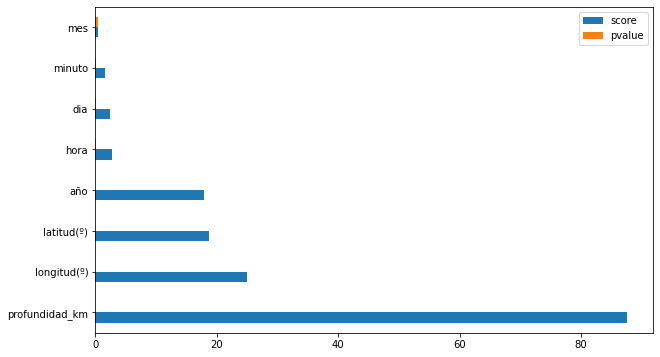

In [59]:
# generar una grafica de barras con los scores en orden ascendente
df_scores.sort_values(by='score', ascending=False).plot(kind='barh', figsize=(10, 6))

<AxesSubplot:>

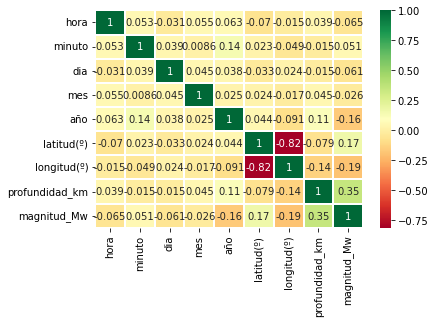

In [60]:
# ver la correlación entre las variables con un mapa de calor
sns.heatmap(df_sismos.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

In [61]:
# eliminamos las columnas minuto , dia y hora que no son importantes
df_sismos = df_sismos.drop(['minuto','dia','hora'], axis=1)
df_sismos.head()

,provincia,region,mes,año,latitud(º),longitud(º),profundidad_km,magnitud_Mw
0,Cotabambas,Apurímac,8,1700,-13.90,-72.1,10.0,4.43175
1,Cotabambas,Apurímac,9,1707,-13.90,-72.1,10.0,4.70310
2,MAR,MAR,5,1709,-12.60,-77.5,60.0,4.88400
3,Huamanga,Ayacucho,6,1719,-13.20,-74.4,20.0,4.88400
4,Paruro,Cusco,11,1744,-13.77,-72.1,20.0,5.28600


In [62]:
# eliminamos los espacios en blanco de la columna region
df_sismos['region'] = df_sismos['region'].str.strip()

In [63]:
# seleccionar los sismos que ocurrieron en la region de Lima
df_sismos = df_sismos[df_sismos['region']=='Lima']

In [64]:
# redondear la magnitud a 2 decimales
df_sismos['magnitud_Mw'] = df_sismos['magnitud_Mw'].round(2)

In [68]:
df_sismos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 40 to 839
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       36 non-null     object 
 1   region          36 non-null     object 
 2   mes             36 non-null     int64  
 3   año             36 non-null     int64  
 4   latitud(º)      36 non-null     float64
 5   longitud(º)     36 non-null     float64
 6   profundidad_km  36 non-null     float64
 7   magnitud_Mw     36 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.5+ KB


In [65]:
# guardamos el archivo en formato csv
df_sismos.to_csv("IGP_datos_sismicosHistórico_V2.csv", index=False)

### ¡FIN TRABAJO!